In [1]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

Using TensorFlow backend.


Initialized TensorFlow


### Fixed single Boston experiment for all dataset as points

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [2]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [10]:
repetitions = 5
Ns = np.arange(10, 200, 50)
print('Total runs: %d' % (repetitions * len(Ns)))

Total runs: 20


In [13]:
def run_for_N(N = 50):
    """ Train a network with given h1 size and compute mean FT variance """
    K.clear_session()
    
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = 'plot',
                                  reg_coeff = 0, reg_type = 'l2')
    
    print('Loss: %s' % str(exp.get_mae_correct()))

    # obtaining data points
    data = exp.get_inputs(50)

    # obtaining errors and bounds for data points
    rmean, rstd = exp.run(data, repetitions = 10000)

    return np.mean(rstd['experiment'] ** 2)


  0%|          | 0/4 [00:00<?, ?it/s]

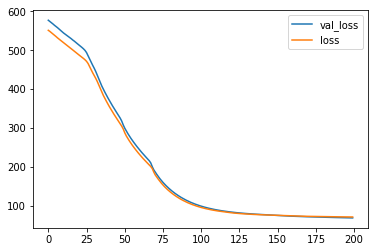

Loss: {'train': 5.876085789368884, 'test': 6.013893770704082}


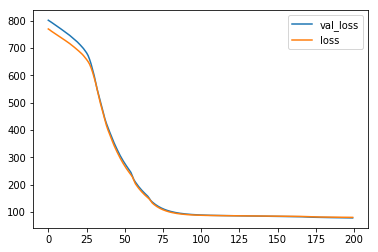

Loss: {'train': 6.306869053604579, 'test': 6.218427074656767}


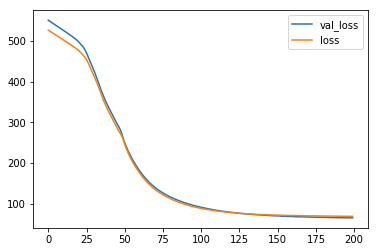

Loss: {'train': 5.743932761296188, 'test': 6.036644958047305}


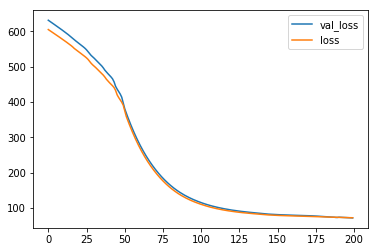

Loss: {'train': 5.80705431333863, 'test': 5.988252108704811}


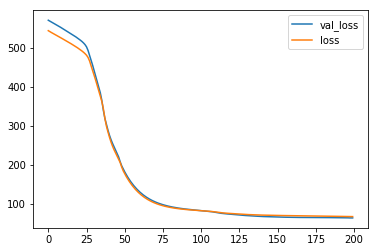

Loss: {'train': 5.571522914301051, 'test': 5.9308312846165085}



 25%|██▌       | 1/4 [01:32<04:38, 92.81s/it]

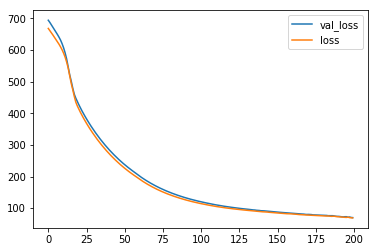

Loss: {'train': 5.308007934305928, 'test': 5.756245078292547}


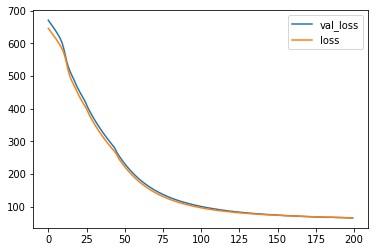

Loss: {'train': 5.127168200275686, 'test': 5.826804106843238}


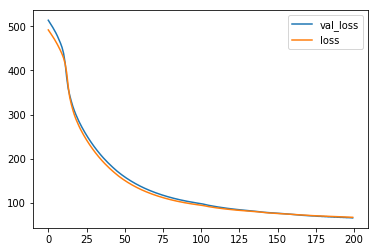

Loss: {'train': 5.5325817665251185, 'test': 5.93662649416456}


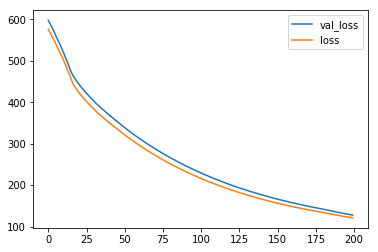

Loss: {'train': 7.778143794937889, 'test': 8.700950297187356}


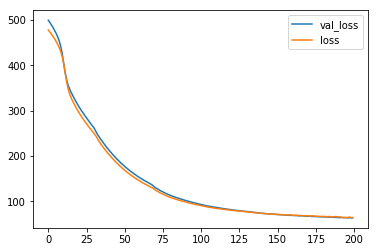

Loss: {'train': 5.270541446043714, 'test': 5.883728580848844}



 50%|█████     | 2/4 [02:54<02:58, 89.45s/it]

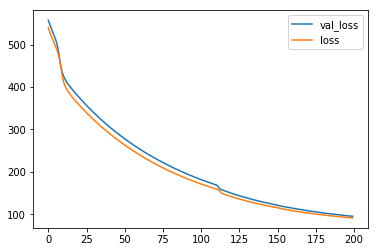

Loss: {'train': 6.368404700968526, 'test': 7.075675306133196}


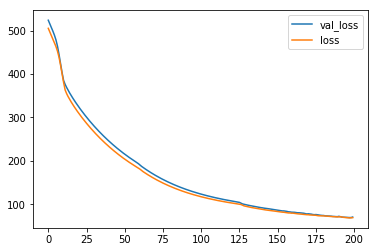

Loss: {'train': 5.5306220210424755, 'test': 5.88695463105744}


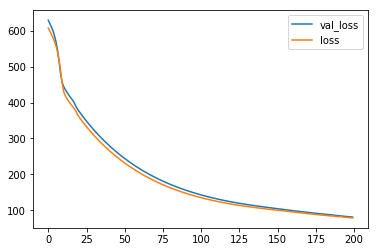

Loss: {'train': 5.72843455040809, 'test': 6.311157292010737}


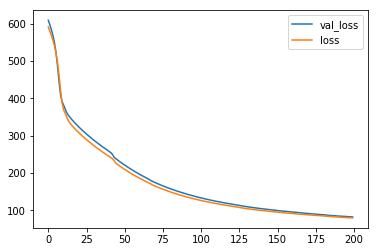

Loss: {'train': 5.813007510062492, 'test': 6.42540521995694}


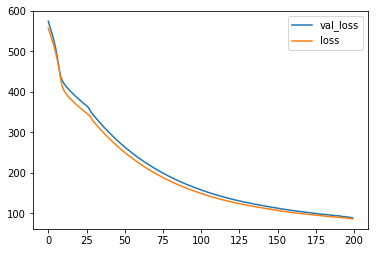

Loss: {'train': 6.1369396219159125, 'test': 6.7623789918188955}



 75%|███████▌  | 3/4 [04:04<01:23, 83.49s/it]

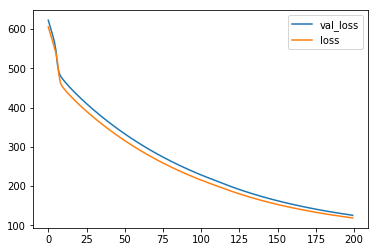

Loss: {'train': 7.688568707267837, 'test': 8.600905541812672}


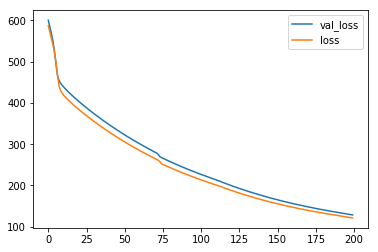

Loss: {'train': 7.761393702856385, 'test': 8.721763191971124}


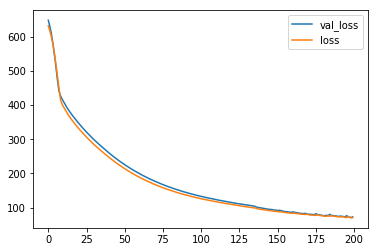

Loss: {'train': 5.608383438846853, 'test': 5.905147791843788}


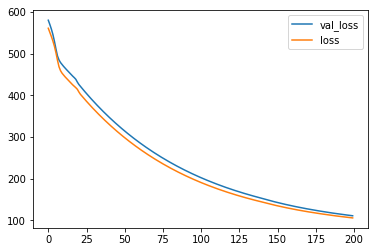

Loss: {'train': 7.1347652029283, 'test': 7.900369595546349}


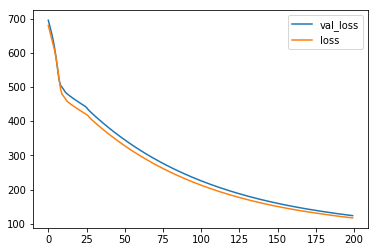

Loss: {'train': 7.599001553035018, 'test': 8.51517890481388}



100%|██████████| 4/4 [05:42<00:00, 87.95s/it]


In [14]:
results = [[run_for_N(N) for _ in range(repetitions)] for N in tqdm(Ns)]

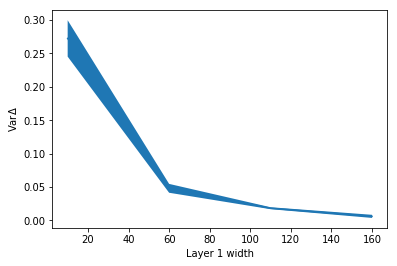

In [18]:
mean = np.mean(results, axis = 1)
std = np.std(results, axis = 1) / len(results[0])
plt.figure()
plt.xlabel('Layer 1 width')
plt.ylabel('Var$\Delta$')
plt.plot(Ns, mean)
plt.fill_between(Ns, mean - std, mean + std)
#plt.ylim(0,0.2)
plt.savefig('figures/comparison_architecture_boston.eps', bbox_inches = 'tight')
plt.show()

In [19]:
# fitting line to logarithmic plot
np.polyfit(Ns, np.log(mean), 1)

array([-0.02483988, -1.25405017])

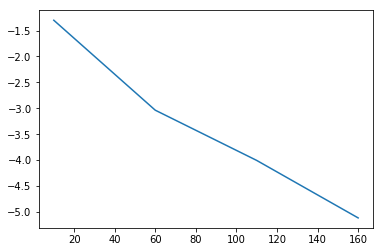

In [20]:
# logarithmic plot
plt.plot(Ns, np.log(mean))

The issue might be that networks do not converge to the same thing (no mean-field limi)